In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [62]:
#Method for calculating the Hamiltonian given the current state of the Ising configuration.
def hamiltonian(ising_config):
    H = 0
    for i in range(0,10):
        for j in range(0,10):
            #Take mod 10 in the right and left edge cases - where the indices i,j plus or minus 1 would go off the edge of the 10x10 ising 
            #configuration, we must ensure that they wrap around to the other side of the square.
            H += ising_config[i][j] * (ising_config[(i+1) % 10][j] + ising_config[(i-1) % 10][j] + ising_config[i][(j+1) % 10] + ising_config[i][(j-1) % 10])
            
    return -1/2 * H

#Method that simulates the Ising model over N steps at a given temperature T.
#Params:
#   N - The number of iterations we want to iterate the Ising model over.
#   T - The temperature value we use for our acceptance check.
#   is_cumulative - If true, we store the magnetization values every N = 100, returning an array (used for part a.); if false, we only store
#                   and return a single M value (used for part b. when we vary temperature while N is fixed).
#Returns:
#   Ms - A running list of the average magnetization, <M>.
#   Es - A running list of the system energy, E.
#   Cs - A running list of the specific heat, C.
#   Chis - A running list of the susceptibility, Chi.
def ising(N, T):
    #1. Create an initial Ising configuration as a 10x10 array of 1s.
    ising_config = np.ones((10,10))
    #Calculate initial Hamiltonian so we can find delta E on the first loop that we run through.
    H_old = hamiltonian(ising_config)
    #Keep track of the sums of all elements in the current ising configuration, and also keep a running total of all these sums in order
    #to determine our Ns later.
    running_ising_sum = np.sum(ising_config)

    #Our array of running averaged magnetization values.
    M_avgs = []
    #To keep track of individual M values so we can calculate <M^2> more easily for the bonus part.
    Ms = []
    #Our quantities to be analyzed in the bonus problem.
    Es = []
    Cs = []
    Chis = []


    #Loop over N total steps.
    for n in range(1,N+1):
        #2. Randomly flip a spin in the lattice using np.random.
        i = np.random.randint(0,10)
        j = np.random.randint(0,10)
        ising_config[i,j] = -1 * ising_config[i,j]

        #3. Calculate the new Hamiltonian, then take the difference between it and the Hamiltonian from the last iteration.
        H = hamiltonian(ising_config)
        delta_E = H - H_old

        #Update the sum of all elements in our Ising configuration.
        cur_ising_sum = np.sum(ising_config)
        running_ising_sum += cur_ising_sum

        #4. If delta_E < 0, we accept the move; otherwise, we accept the move with probability e^(-delta_E / T). The only time we
        #need to do anything here is if the move is not accepted - in this case, we negate the relevant element of the Ising configuration to
        #undo the change to the array we made earlier. This amounts to checking the contrapositive of the two conditions specified.
        if (delta_E > 0) and (np.random.random() > np.exp(-delta_E / T)):
            ising_config[i,j] = -1 * ising_config[i,j]
        else:
            H_old = H

        #Add to our running array of M values if we are looking to vary over N and are on a multiple of 100. Also update our other lists of values to be considered in the bonus part at the
        #same frequency.
        if (n % 100 == 0):
            M_avgs.append(1 / n * running_ising_sum)
            Ms.append(cur_ising_sum)

            #(Bonus) Keep track of system energy.
            Es.append(H)

            #(Bonus) Keep track of the specific heat C, given by the difference between the average of E^2 and the average of E, squared, all divided by the product of the Boltzmann constant and T.
            avg_E = np.mean(Es)
            avg_E2 = np.mean(np.square(Es))
            Cs.append((avg_E2 - avg_E**2) / (1.38 * 10**(-23) * T))

            #(Bonus) Keep track of the susceptibility chi, given by the difference between the average of M^2 and the average of M, squared, all divided by the product of the Boltzmann constant 
            #and T.
            avg_M = M_avgs[-1]
            avg_M2 = np.mean(np.square(Ms))
            Chis.append((avg_M2 - avg_M**2) / (1.38 * 10**(-23) * T))

    return M_avgs, Es, Cs, Chis

# Task a.)

Calculate the magnetization 

$< M > = \frac{1}{N} \sum\limits_{i,j \in \Lambda} s_{i,j}$

as a function of the number of Monte Carlo steps $N$. Plot $< M >$ as a function of $N$, where $N$ starts at 0 and ends at 10000 with step size $\Delta N = 100$. Does the magnetization converge to an equilibrium value?

Text(0, 0.5, '<M>')

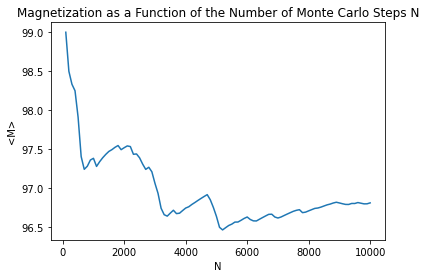

In [63]:
#Calculate magnetization using the ising() function above and plot the results. Use a temperature of T=1.5 here as specified in the task
#description.
Ns = np.arange(100,10100,100)
T = 1.5
Ms, Es, Cs, Chis = ising(Ns[-1], T)

fig = plt.plot(Ns, Ms)
plt.title("Magnetization as a Function of the Number of Monte Carlo Steps N")
plt.xlabel("N")
plt.ylabel("<M>")

# Task b.)
Scan the temperature $T$ from 1.5 to 3.25 with 10 steps. For each temperate step, $<M>$ is calculated with 10000 MC sampling steps. Plot $<M>$ as a function of $T$.

Text(0, 0.5, '<M>')

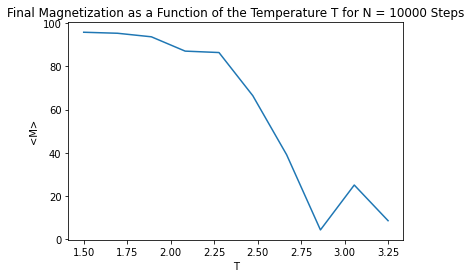

In [67]:
#Calculate magnetization using the ising() function above and plot the results. Use the temperature range given in the task description above.
N_temp = 10000
Ts = np.linspace(1.5, 3.25, 10)
Ms_vary_T = []
Es_vary_T = []
Cs_vary_T = []
Chis_vary_T = []

for T in Ts:
    output = ising(N_temp, T)
    #Only store the last element from each output since we are just looking to analyze how the final, stable output values vary with T.
    Ms_vary_T.append(output[0][-1])
    Es_vary_T.append(output[1][-1])
    Cs_vary_T.append(output[2][-1])
    Chis_vary_T.append(output[3][-1])

fig = plt.plot(Ts, Ms_vary_T)
plt.title("Final Magnetization as a Function of the Temperature T for N = 10000 Steps")
plt.xlabel("T")
plt.ylabel("<M>")

# Bonus

Here, we repeat the tasks about to analyze the following quantities:

a) System energy $E = H(S')$

b) Specific Heat $C = \frac{<E^2> - <E>^2}{k_B T}$

c) Susceptibility $\chi = \frac{<M^2> - <M>^2}{k_B T}$

These quantities already exist as return values from the ising() method that we used in parts a) and b), so we can simply plot Es, Cs, and Chis below using the values stored for them above.

Text(0, 0.5, '$\\chi$')

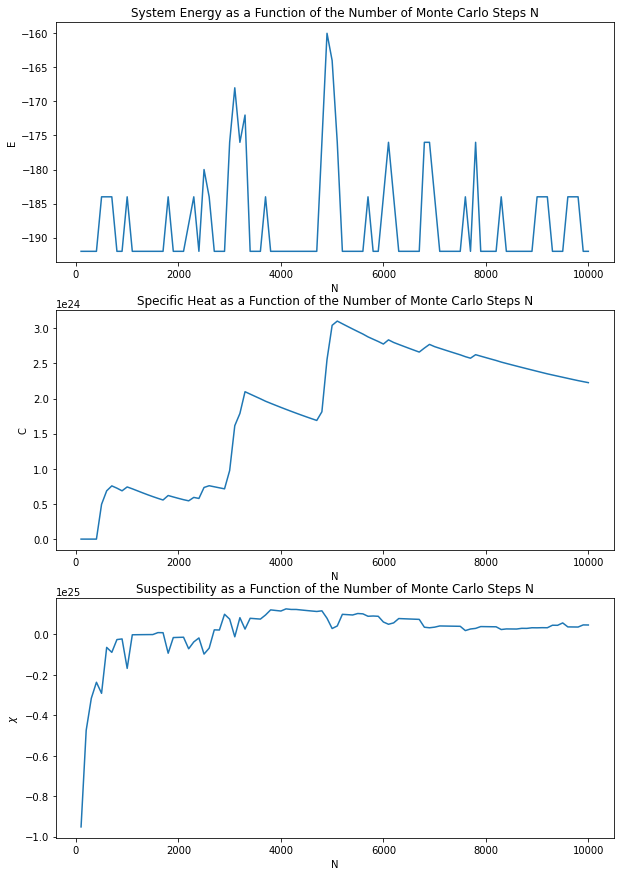

In [68]:
#Part a) - Plot system energy, specific heat, and suspectibility results vs. N.
fig, axs = plt.subplots(3, 1, figsize=(10,15))

#System energy
axs[0].plot(Ns, Es)
axs[0].set_title("System Energy as a Function of the Number of Monte Carlo Steps N")
axs[0].set_xlabel("N")
axs[0].set_ylabel("E")

#Specific heat
axs[1].plot(Ns, Cs)
axs[1].set_title("Specific Heat as a Function of the Number of Monte Carlo Steps N")
axs[1].set_xlabel("N")
axs[1].set_ylabel("C")

#Suspectibility
axs[2].plot(Ns, Chis)
axs[2].set_title("Suspectibility as a Function of the Number of Monte Carlo Steps N")
axs[2].set_xlabel("N")
axs[2].set_ylabel("$\chi$")

Text(0, 0.5, '$\\chi$')

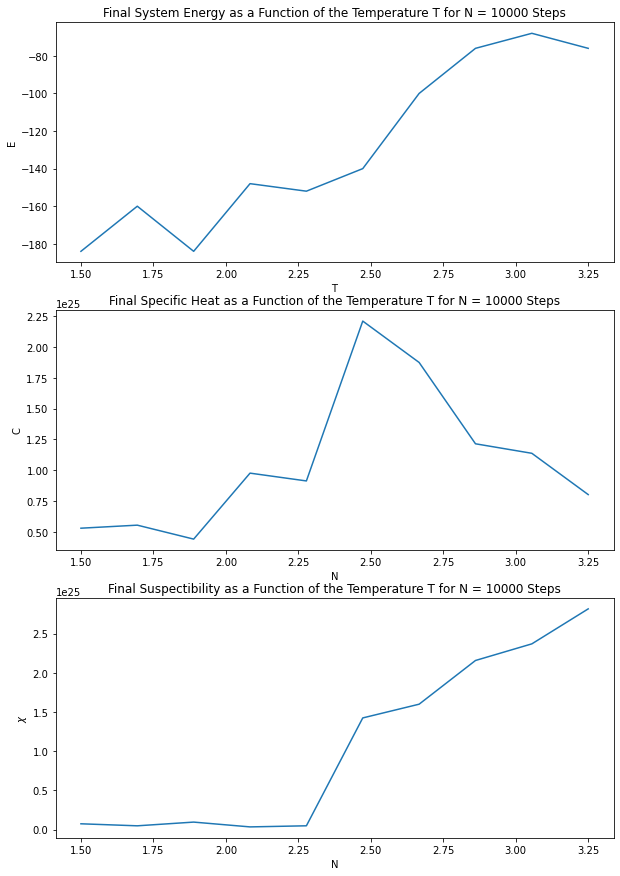

In [69]:
#Part b) - Plot final system energy, specific heat, and suspectibility values vs. T.
fig, axs = plt.subplots(3, 1, figsize=(10,15))

#System energy

axs[0].plot(Ts, Es_vary_T)
axs[0].set_title("Final System Energy as a Function of the Temperature T for N = 10000 Steps")
axs[0].set_xlabel("T")
axs[0].set_ylabel("E")

#Specific heat
axs[1].plot(Ts, Cs_vary_T)
axs[1].set_title("Final Specific Heat as a Function of the Temperature T for N = 10000 Steps")
axs[1].set_xlabel("N")
axs[1].set_ylabel("C")

#Suspectibility
axs[2].plot(Ts, Chis_vary_T)
axs[2].set_title("Final Suspectibility as a Function of the Temperature T for N = 10000 Steps")
axs[2].set_xlabel("N")
axs[2].set_ylabel("$\chi$")